In [1]:
import pandas as pd;
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
df=pd.read_csv("heart.csv");
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

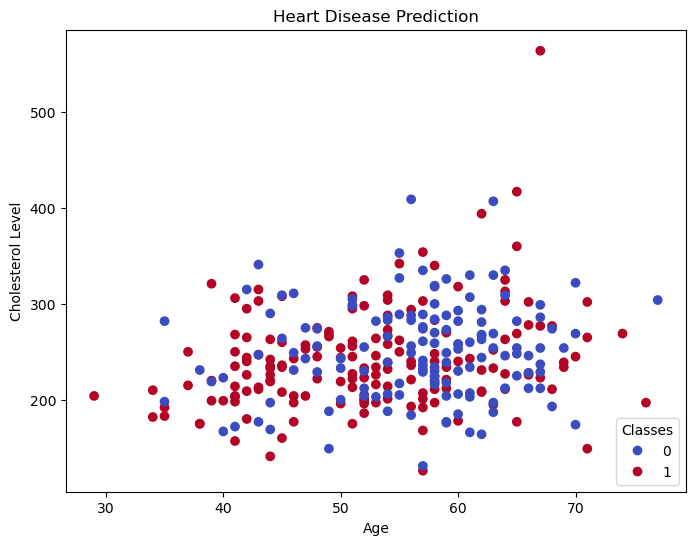

In [6]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['age'], df['chol'], c=df['target'], cmap='coolwarm')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Heart Disease Prediction')

# Add legend
plt.legend(*scatter.legend_elements(), loc='lower right', title='Classes')

# Show the plot
plt.show()

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X,y=df.drop(['target'],axis=1),df.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [11]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
model.score(X_test,y_test)

0.8852459016393442

In [14]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [21]:
model.predict([[57	,1	,2	,150	,126	,1	,1	,173	,0	,0.2	,2	,1	,3]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [16]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

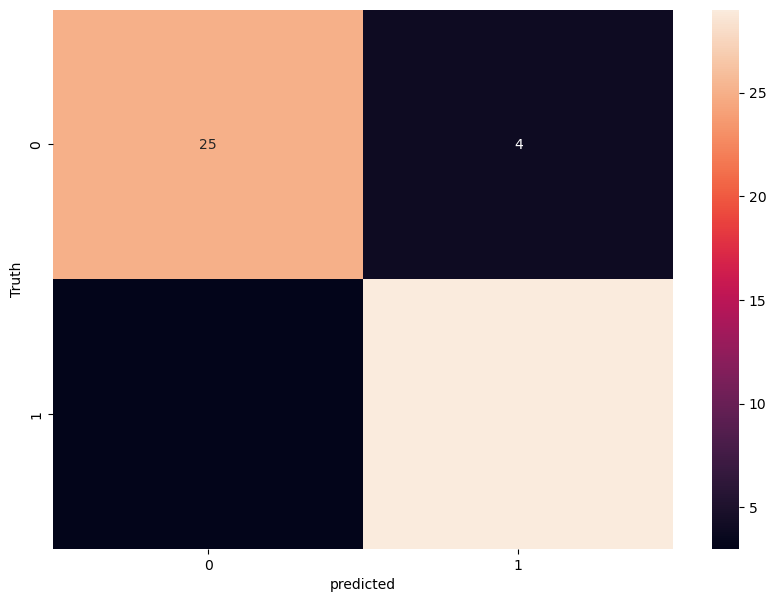

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True )
plt.xlabel('predicted')
plt.ylabel('Truth')